In [1]:
from collections import defaultdict

import utility
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import statistics 

In [2]:
input = {
    20: 'synthetic20generator_uniform_prior_uniform-max_finder-time.csv',
    30: 'synthetic30generator_uniform_prior_uniform-max_finder-time.csv',
    40: 'synthetic40generator_uniform_prior_uniform-max_finder-time.csv',
    60: 'synthetic60generator_uniform_prior_uniform-max_finder-time.csv',
    80: 'synthetic80generator_uniform_prior_uniform-max_finder-time.csv'
}

numerosities = [30, 40, 60, 80]
#numerosities_without_filters = [20, 30, 40]
numerosities_with_filters = [20, 30, 40, 60, 80]

# Functions below try to retrieve the informations which they need using regex on input_file. If they failed
# than variabile will be initialized with value in except part
try:
    family = utility.get_family_name(input_file)
except:
    family = 'synthetic'
    
try:
    generator_prior = get_generator_prior(input_file)
except:
    generator_prior = 'generator_uniform_prior_uniform'
    
  
filters, recommenders, vois, time = utility.read_input_files(input)
filters_without_all = filters.copy()
#filters_without_all.remove(" All")
vois = [" Vals"]
recommenders = [" Valr"]

max_finders = ["simple", "smart", "sr", "sh"]

voiName = utility.get_voi_name()
filterName = utility.get_filter_name()
recName = utility.get_rec_name()
finderName = utility.get_finder_name()

voiStyle = utility.get_voi_style()
filterStyle = utility.get_filter_style()
recStyle = utility.get_rec_style()
finderStyle = utility.get_finder_style()

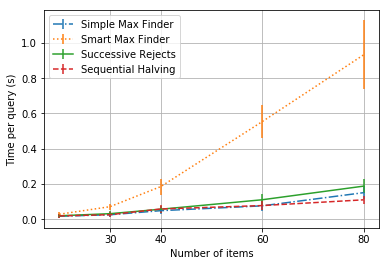

In [3]:
#for filt in filters_without_all:
for filt in filters:
    for recom in recommenders:
        for voi in vois:
            fig = plt.figure(figsize=(6,4))
            ax = fig.subplots()
            new_plot = False
            for finder in max_finders: 
                there_is_combination_of_filt_recom_voi_finder = False
                x_vals = []
                y_vals = []
                y_err = []

                for num in numerosities_with_filters:
                    table = time[num]
                    row = table[ (table['recommender'] == recom) & (table['filter'] == filt) & (table['selector'] == voi) &
                                (table['max_finder'] == finder)]

                    if not row.empty:
                        there_is_combination_of_filt_recom_voi_finder = True
                        new_plot = True
                        x_vals.append(num)
                        y_vals.append(row.iloc[0].average_time)
                        y_err.append(row.iloc[0].stddev_time)

                if there_is_combination_of_filt_recom_voi_finder:
                    ax.errorbar(x_vals, y_vals,  yerr=y_err, label=finderName[finder.strip()], linestyle=finderStyle[finder.strip()])  
            if new_plot:
                ax.set(xlabel='Number of items', xticks=list(numerosities), ylabel='Time per query (s)')

                ax.grid()
                ax.legend()
                plt.show()
                # Title of the Fig. 
                #title = "time-fig-selector-time"+ "_" + filt +"-"+ recom + ".pdf"
                title = "time_"+recom+"-"+voi+"-"+filt+"-max_finder.pdf"
                fig.savefig(title, pad_inches=0, bbox_inches='tight')